# NBA Player Performance Prediction Model

Utilizes a variety of features to predict NBA Players Points in a season.


In [54]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, optimizers, regularizers
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model



# Import Data
data_2122=pd.read_csv('/content/2021-2022 NBA Player Stats - Regular.csv', sep =";", encoding='latin-1')
data_2223=pd.read_csv('/content/2022-2023 NBA Player Stats - Regular.csv', sep =";", encoding='latin-1')
data_2324=pd.read_csv('/content/2023-2024 NBA Player Stats - Regular.csv', sep =";", encoding='latin-1')

data_2122['Season'] = '2021-2022'
data_2223['Season'] = '2022-2023'
data_2324['Season'] = '2023-2024'
combined_data = pd.concat([data_2122, data_2223, data_2324], ignore_index=True)

key_columns = ['FG', 'FGA', '3P', '3PA', 'FT', 'FTA', 'MP', 'eFG%', 'PTS', 'Rk']
combined_data.dropna(subset=key_columns, inplace=True)

features = ['FG', 'FGA', '3P', '3PA', 'FT', 'FTA', 'MP', 'eFG%', 'PTS']
combined_data[features] = (combined_data[features] - combined_data[features].mean()) / combined_data[features].std()

target = 'Rk'

X = combined_data[features]
y = combined_data[target]

y_mean = y.mean()
y_std = y.std()
y = (y - y_mean) / y_std

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_100 (Dense)           (None, 128)               1280      
                                                                 
 dropout_75 (Dropout)        (None, 128)               0         
                                                                 
 dense_101 (Dense)           (None, 64)                8256      
                                                                 
 dropout_76 (Dropout)        (None, 64)                0         
                                                                 
 dense_102 (Dense)           (None, 32)                2080      
                                                                 
 dropout_77 (Dropout)        (None, 32)                0         
                                                                 
 dense_103 (Dense)           (None, 1)               

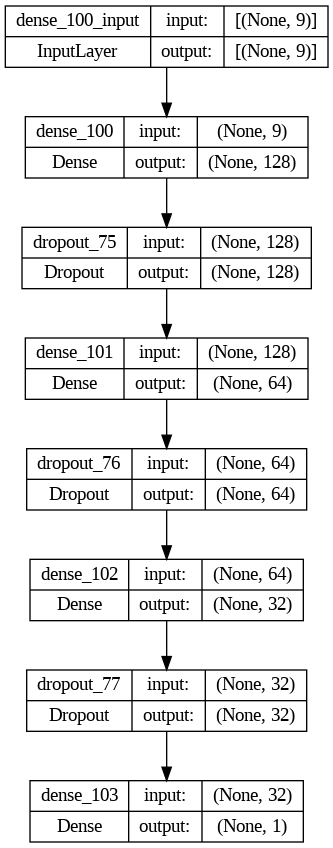

In [55]:
model = models.Sequential([
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(X_train.shape[1],)),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(1)
])

model.summary();
plot_model(model, to_file='model.png', show_shapes=True)


In [13]:
optimizer = optimizers.Adam(learning_rate=0.001)
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mean_squared_error', 'mean_absolute_error'])
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/100
156/156 [==============================] - 2s 5ms/step - loss: 1.2866 - mean_squared_error: 1.1501 - mean_absolute_error: 0.9079 - val_loss: 1.0990 - val_mean_squared_error: 0.9651 - val_mean_absolute_error: 0.8406
Epoch 2/100
156/156 [==============================] - 0s 3ms/step - loss: 1.1851 - mean_squared_error: 1.0537 - mean_absolute_error: 0.8823 - val_loss: 1.0943 - val_mean_squared_error: 0.9652 - val_mean_absolute_error: 0.8405
Epoch 3/100
156/156 [==============================] - 1s 3ms/step - loss: 1.1741 - mean_squared_error: 1.0473 - mean_absolute_error: 0.8826 - val_loss: 1.0895 - val_mean_squared_error: 0.9649 - val_mean_absolute_error: 0.8409
Epoch 4/100
156/156 [==============================] - 1s 3ms/step - loss: 1.1530 - mean_squared_error: 1.0304 - mean_absolute_error: 0.8749 - val_loss: 1.0855 - val_mean_squared_error: 0.9651 - val_mean_absolute_error: 0.8414
Epoch 5/100
156/156 [==============================] - 1s 3ms/step - loss: 1.1444 - mean_squ

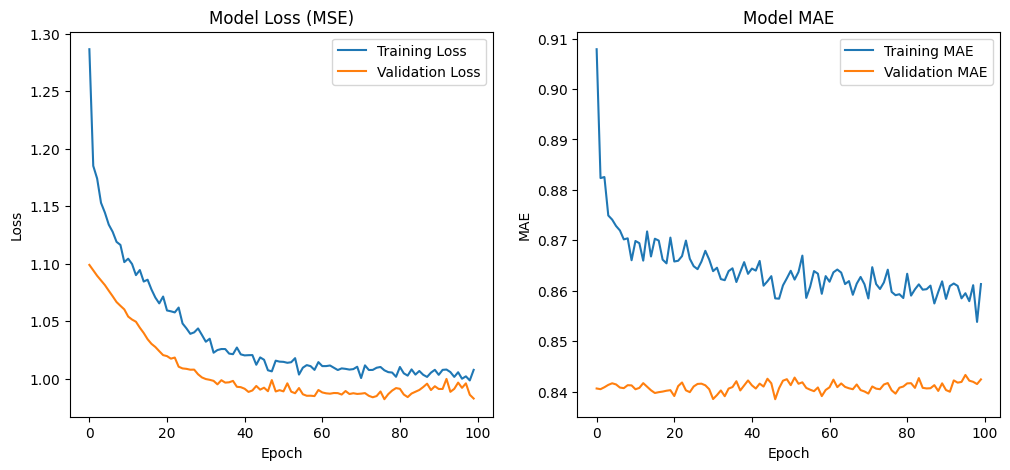

In [14]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)  # first subplot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)  # second subplot
plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.show()

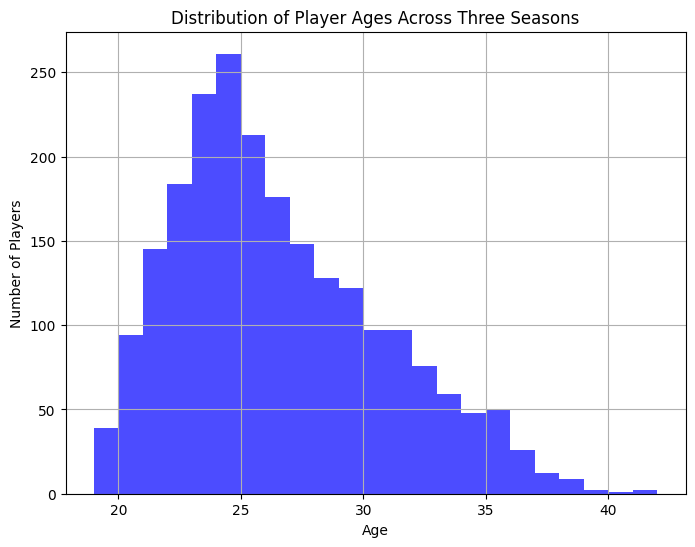

In [21]:
plt.figure(figsize=(8, 6))
plt.hist(combined_data['Age'], bins=range(min(combined_data['Age']), max(combined_data['Age']) + 1, 1), color='blue', alpha=0.7)
plt.title('Distribution of Player Ages Across Three Seasons')
plt.xlabel('Age')
plt.ylabel('Number of Players')
plt.grid(True)
plt.show()

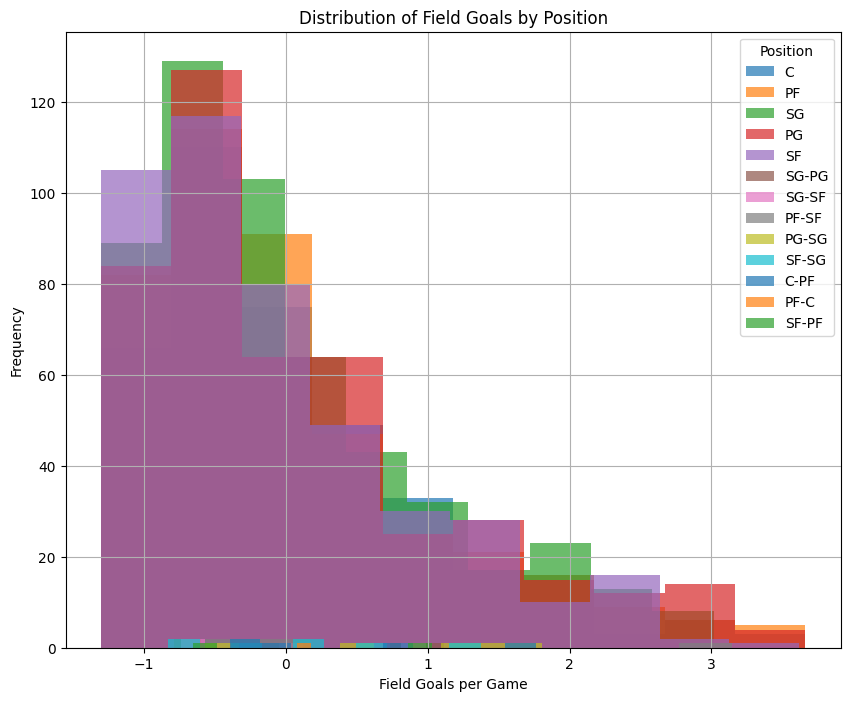

In [20]:
plt.figure(figsize=(10, 8))
positions = combined_data['Pos'].unique()

for pos in positions:
    subset = combined_data[combined_data['Pos'] == pos]
    plt.hist(subset['FG'], bins=10, alpha=0.7, label=pos)

plt.title('Distribution of Field Goals by Position')
plt.xlabel('Field Goals per Game')
plt.ylabel('Frequency')
plt.legend(title='Position')
plt.grid(True)
plt.show()

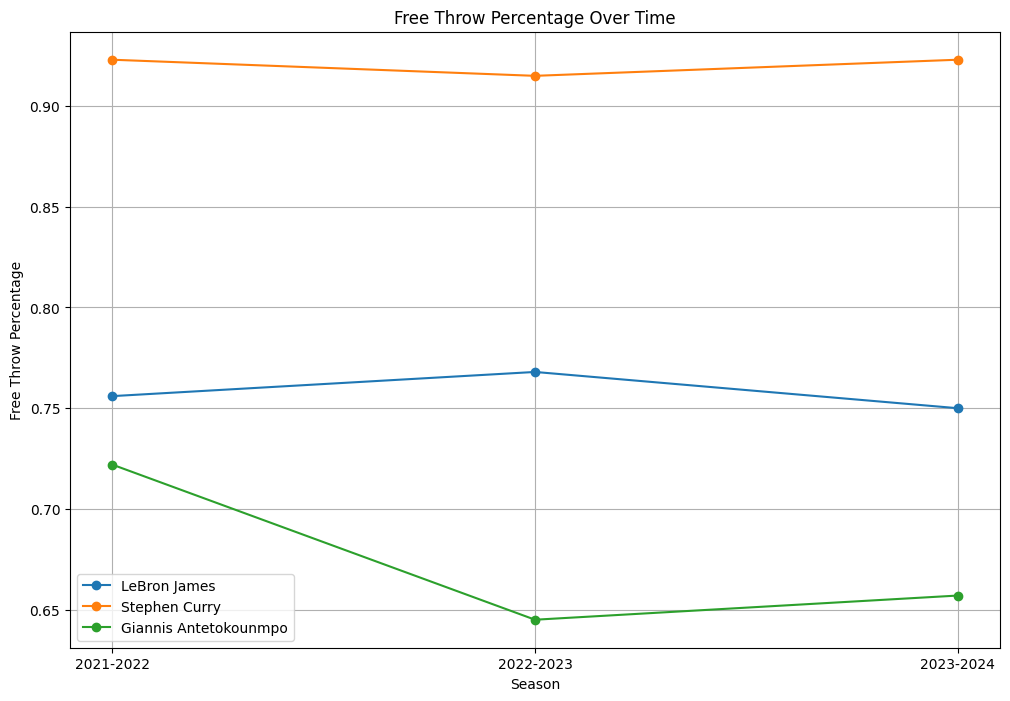

In [19]:
players = ['LeBron James', 'Stephen Curry', 'Giannis Antetokounmpo']
fig, ax = plt.subplots(figsize=(12, 8))

for player in players:
    player_data = combined_data[combined_data['Player'] == player]
    ax.plot(player_data['Season'], player_data['FT%'], marker='o', label=player)

ax.set_title('Free Throw Percentage Over Time')
ax.set_xlabel('Season')
ax.set_ylabel('Free Throw Percentage')
ax.legend()
plt.grid(True)
plt.show()


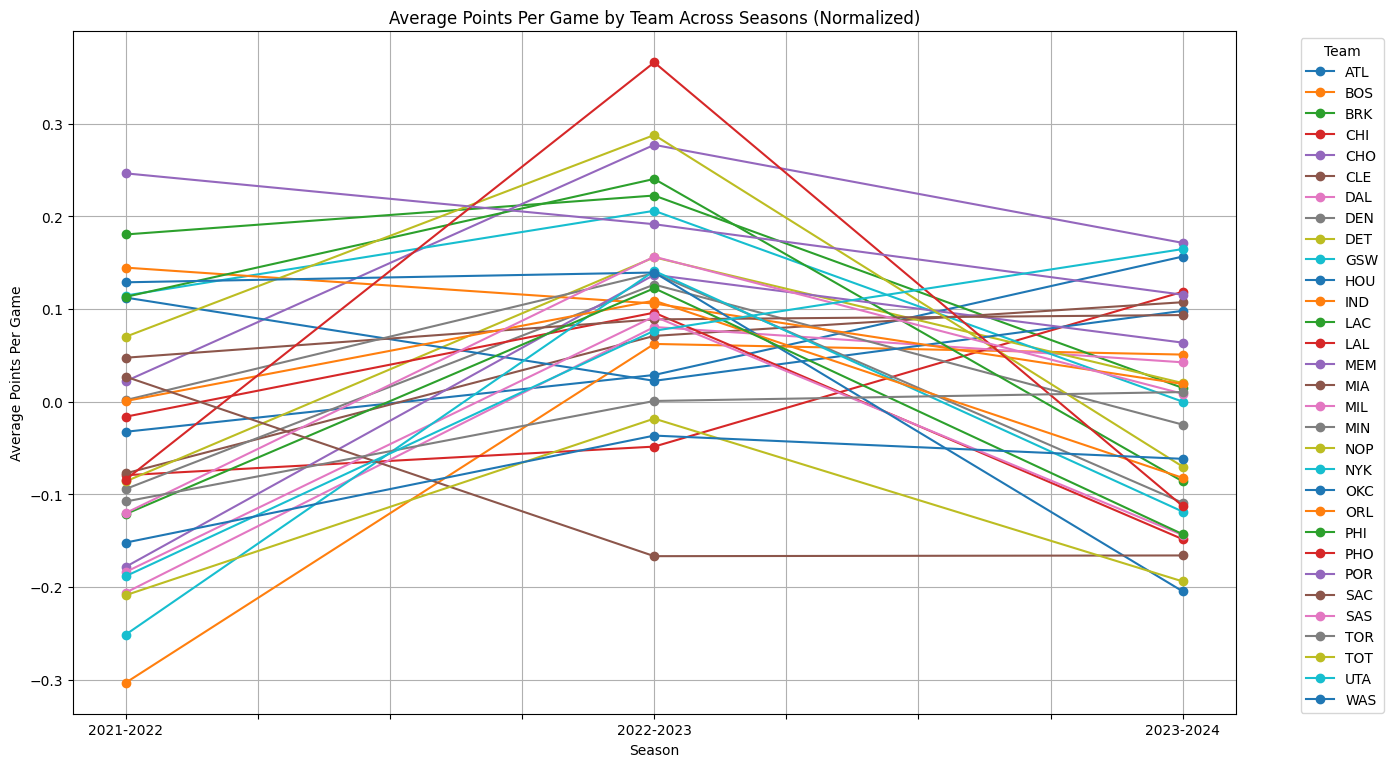

In [18]:
team_avg_pts = combined_data.groupby(['Season', 'Tm'])['PTS'].mean().unstack()

team_avg_pts.plot(kind='line', marker='o', figsize=(14, 8))
plt.title('Average Points Per Game by Team Across Seasons (Normalized)')
plt.xlabel('Season')
plt.ylabel('Average Points Per Game')
plt.grid(True)
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


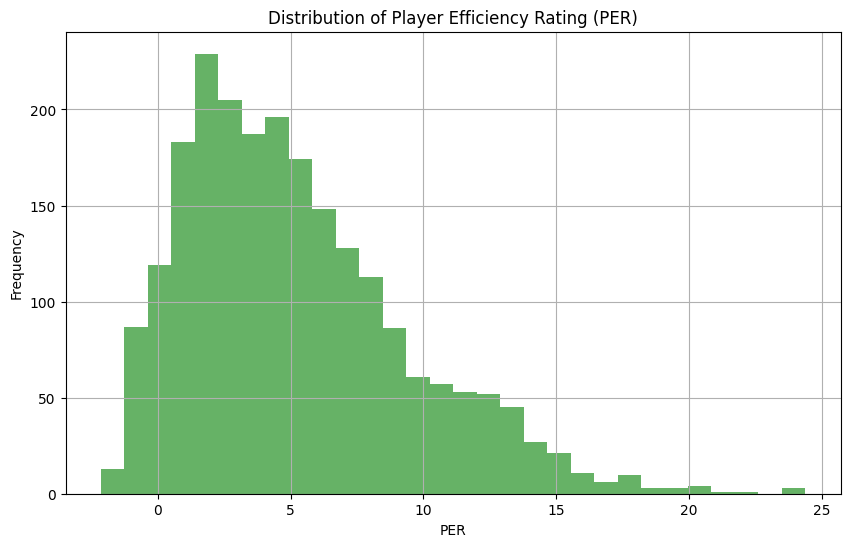

In [16]:
combined_data['PER'] = (combined_data['PTS'] + combined_data['AST'] + combined_data['TRB'] + combined_data['STL'] + combined_data['BLK']
                        - (combined_data['FGA'] - combined_data['FG']) - (combined_data['FTA'] - combined_data['FT']) - combined_data['TOV'])

plt.figure(figsize=(10, 6))
plt.hist(combined_data['PER'], bins=30, color='green', alpha=0.6)
plt.title('Distribution of Player Efficiency Rating (PER)')
plt.xlabel('PER')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


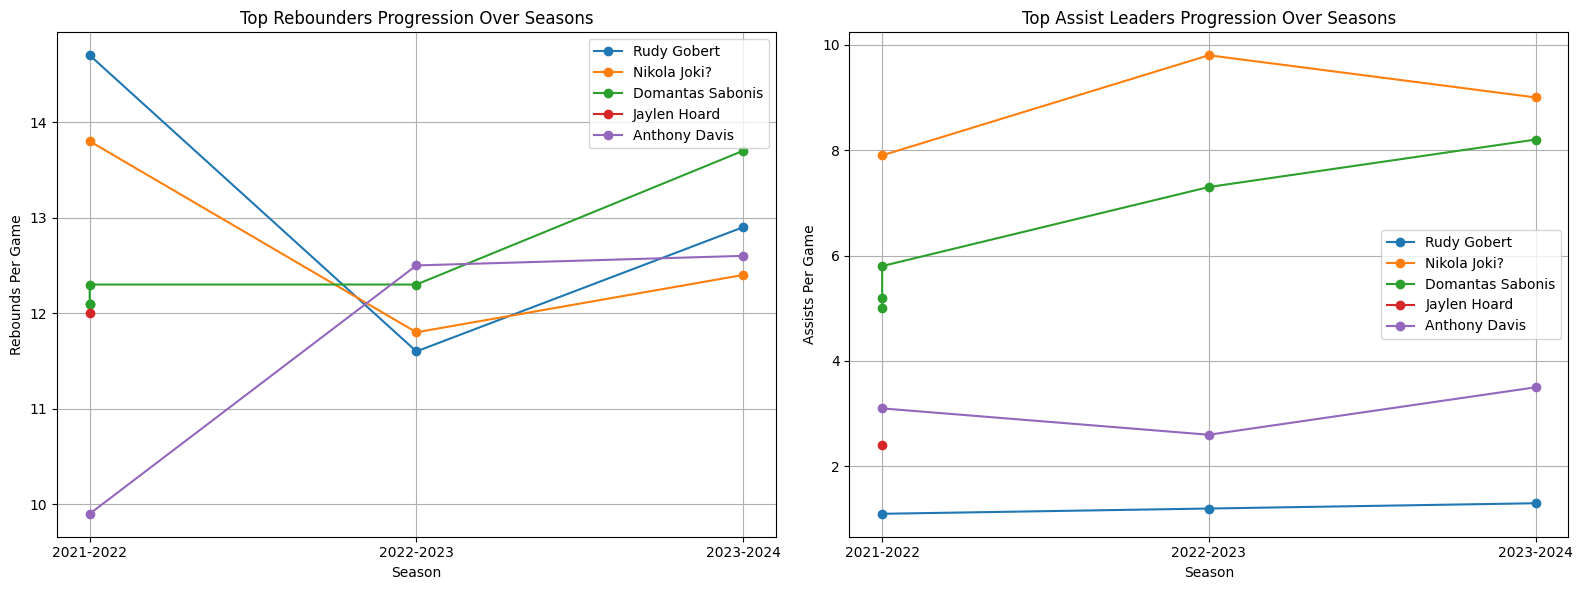

In [17]:
top_players = combined_data.groupby('Player')[['TRB', 'AST']].mean().nlargest(5, 'TRB')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for player in top_players.index:
    player_data = combined_data[combined_data['Player'] == player]
    ax1.plot(player_data['Season'], player_data['TRB'], marker='o', label=player)
    ax2.plot(player_data['Season'], player_data['AST'], marker='o', label=player)

ax1.set_title('Top Rebounders Progression Over Seasons')
ax1.set_xlabel('Season')
ax1.set_ylabel('Rebounds Per Game')
ax1.legend()
ax1.grid(True)

ax2.set_title('Top Assist Leaders Progression Over Seasons')
ax2.set_xlabel('Season')
ax2.set_ylabel('Assists Per Game')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()